![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia e polinômios originais**: Luan Lima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Analisando o método de Newton

## Questão 1: Implementação e testes simples

Implemente abaixo a função `newton_pts`, que executa o método de Newton,
retornando todos os pontos percorridos pelo algoritmo até atingir algum critério de parada.
Utilize como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    pts = [x]
    niter = 0

    while True:
        reached_maxiter = niter == maxiter
        if reached_maxiter:
            break

        current_x = pts[-1]
        f_of_current_x = f(current_x)

        reached_ytol = abs(f_of_current_x) <= ytol
        if reached_ytol:
            break

        next_x = current_x - (f_of_current_x / df(current_x))
        pts.append(next_x)

        reached_xtol = abs(next_x - current_x) <= xtol
        if reached_xtol:
            break

        niter += 1

    return pts

In [3]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.isclose(zs[-1], 0)
assert 5 <= len(zs) <= 6

In [4]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.abs(zs[-2]-zs[-3]) >= 1e-8

In [5]:
def make_f(a):
    def f(x):
        return np.exp(x)-a
    return f
def df(x): return np.exp(x)

for a in range(2,11):
    f = make_f(a)
    zs = newton_pts(f,df,0,ytol=0)
    assert np.isclose(zs[-1], np.log(a))
    assert np.abs(zs[-1]-zs[-2]) <= 1e-8
    assert np.abs(zs[-2]-zs[-3]) >= 1e-8

## Questão 2: Uma equação trigonométrica

Vamos utilizar os nossos métodos para achar uma solução para uma equação difícil de resolver "na mão":

$$ \sin(x^2) = \cos(x)^2. $$

In [6]:
def f1(x): return np.sin(x**2)
def f2(x): return np.cos(x)**2

Faça um gráfico das funções $\sin(x^2)$ e $\cos(x)^2$ abaixo.

Com a ajuda do gráfico, defina um ponto inicial $x_0$
para o método de Newton encontrar a primeira raiz positiva da equação.

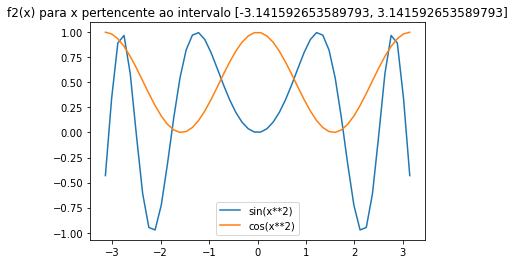

In [7]:
def plot_function(f, left = -1+1e-8, right = 1-1e-8, title = "", label=""):
    x_axis = np.linspace(left, right)
    y_axis = [f(x) for x in x_axis]
    plt.plot(x_axis, y_axis, label=label)
    title = title if title != "" else f"{f.__name__}(x) para x pertencente ao intervalo [{left}, {right}]"
    plt.title(title)

ax = plt.gca()

plot_function(f1, -np.pi, np.pi, label="sin(x**2)")
plot_function(f2, -np.pi, np.pi, label="cos(x**2)")
plt.legend()
plt.show()

In [8]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Faça um gráfico mostrando a evolução do erro em $y$, em função do número de passos efetuados.

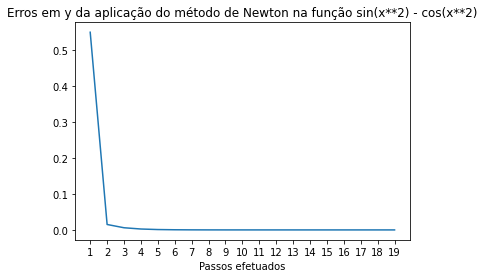

In [9]:
def f3(x):
    return f1(x) - f2(x)

def df3(x):
    return 2*x*(f1(x) + f2(x))

initial_x = 1

y_errors = [abs(f3(x)) for x in newton_pts(f3, df3, initial_x)]
y_errors_steps = [i for i in range(1, len(y_errors) + 1)]

ax = plt.gca()

plt.plot(y_errors_steps, y_errors)
plt.xticks(y_errors_steps)
plt.title("Erros em y da aplicação do método de Newton na função sin(x**2) - cos(x**2)")
plt.xlabel("Passos efetuados")
plt.show()


In [10]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente o resultado.

Vamos primeiro analisar a função em que o método de Newton foi aplicado, sin(x**2) - cos(x**2):

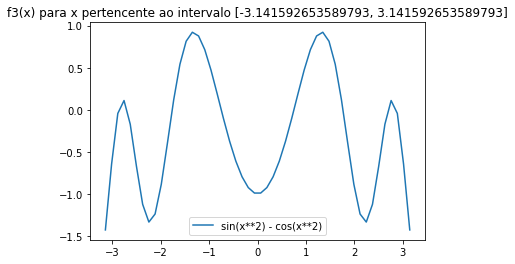

In [11]:
plot_function(f3, -np.pi, np.pi, label="sin(x**2) - cos(x**2)")
plt.legend()
plt.show()

Notamos que para o valor inicial de x (1), a derivada é negativa e bastante inclinada. Seguindo a lógica do algoritimo do Método de Newton, a combinação do valor inicial de x com sua derivada negativa inclinada faz com que o próximo valor de x já esteja próximo da solução encontrada (no caso analisado, x = 0). Por isso o erro do algoritimo cai bruscamente logo na primeira iteração.

Nas iterações que se seguem, a progressiva diminuição da inclinação da derivada de x vai diminuindo a velocidade de convergência, de modo que o erro diminui mais ou menos constantentemente da segunda à décima nona iteração. 

Você acha que seria uma boa ideia fazer um gráfico do erro em $x$ nesse caso?
Porquê?

Acho que sim (mas imagino que esteja achando errado rs). Com o chute inicial de x = 1 e considerando a função mostrada, o método de Newton vai garantir que o valor de x vai se aproximando da raíz (f(x) = 0) sem se distanciar. Podemos confirmar essa intuição plotando o gráfico do erro em x:

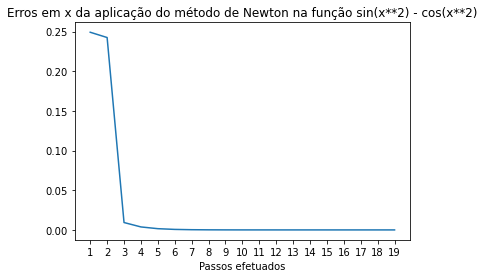

In [12]:
xs = [x for x in newton_pts(f3, df3, initial_x)]
x_errors = [abs(x - xs[i - 1]) for i, x in enumerate(xs)][:]
x_errors_steps = [i for i in range(1, len(x_errors) + 1)]
ax = plt.gca()

plt.plot(x_errors_steps, x_errors)
plt.xticks(x_errors_steps)
plt.title("Erros em x da aplicação do método de Newton na função sin(x**2) - cos(x**2)")
plt.xlabel("Passos efetuados")
plt.show()


De onde observamos um comportamento similar ao do erro em y, mas em menor escala: uma queda brusca no erro nas primeiras iterações e então uma queda constante até atingir o critério de parada.

## Questão 3: Polinômios em `Python`

Para não precisar ficar implementando polinômio por polinômio,
implemente uma função `cria_poli(coefs)` que retorna uma (outra) função `poli(x)`,
que computa o valor do polinômio

$p(X)=$ `coefs[0]`  $+$ `coefs[1]` $X+$ `coefs[2]` $X^2+\dots+$ `coefs[-1]` $X^n$

em $X=$`x`.
As funções de polinômios do `numpy` (`poly1d`, `polyval`, `polyder`) podem lhe ser úteis :-)

No mesmo espírito, crie a função `cria_derivada_poli(coefs)`,
que retorna uma função `derivada_poli(x)` que computa a derivada do polinômio acima em $X=$`x`. 

In [13]:
def cria_poli(coefs):
    def poli(x):
        output = 0
        for exponent, coef in enumerate(coefs):
            output += coef*(x**exponent)
        return output
    return poli

def cria_derivada_poli(coefs):
    def derivada_poli(x):
        output = 0
        for i, coef in enumerate(coefs[1:]):
            exponent = i + 1
            output += coef*exponent*(x**(exponent-1))
        return output
    return derivada_poli

In [14]:
p = cria_poli([1,2,3,4,5,6,7,8])
assert p(0) == 1
assert p(1) == 8*9/2

In [15]:
for n in range(2,11):
    dp = cria_derivada_poli(np.linspace(0,n,n+1))
    assert dp(1) == np.sum([c**2 for c in range(n+1)])

In [16]:
np.random.seed(21)
for n in range(2,6):
    coefs = np.random.rand(n)*100
    x = np.random.rand()*10
    p = cria_poli(coefs)
    dp = cria_derivada_poli(coefs)
    assert np.isclose(p(x+0.002), p(x)+0.002*dp(x))

## Questão 4: Achando as raízes de um polinômio

Defina o polinômio
$p(x) = 1 - \frac{1}{2}x - 4x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5$,
e faça um gráfico que permita visualizar satisfatoriamente a região onde se encontram as suas raízes.

Deduza um intervalo $[a,b]$ que contenha todas as raízes reais de $p(x)$.

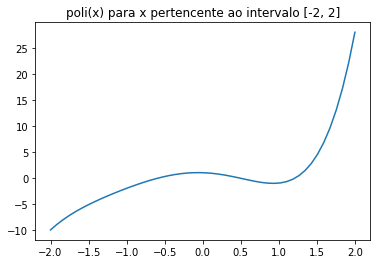

In [17]:
p_coefs = [1, -1/2, -4, 1/2, 3/2, 1/2]
p = cria_poli(p_coefs)

plot_function(p, -2, 2)
plt.show()

Divida o intervalo $[a,b]$ em um número bem grande de pontos.

Faça um gráfico demonstrando o número de iterações necessárias para que o método de Newton convirja,
tendo cada ponto do intervalo como valor inicial.

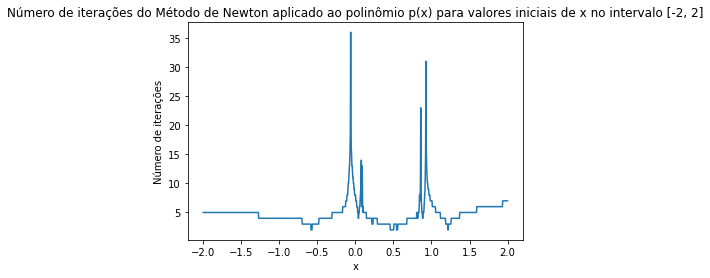

In [18]:
a_b_interval = np.linspace(-2.0, 2.0, num=1000)
dp = cria_derivada_poli(p_coefs)

num_of_iterations_for_initial_x_in_interval = []
for initial_x in a_b_interval:
        num_of_iterations = len(newton_pts(p, dp, initial_x)) - 1
        num_of_iterations_for_initial_x_in_interval.append(num_of_iterations)


ax = plt.gca()
plt.plot(a_b_interval, num_of_iterations_for_initial_x_in_interval)
plt.title("Número de iterações do Método de Newton aplicado ao polinômio p(x) para valores iniciais de x no intervalo [-2, 2]")
plt.xlabel("x")
plt.ylabel("Número de iterações")
plt.show()


In [19]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, faça o gráfico das raizes para as quais o método converge,
em função do ponto inicial.

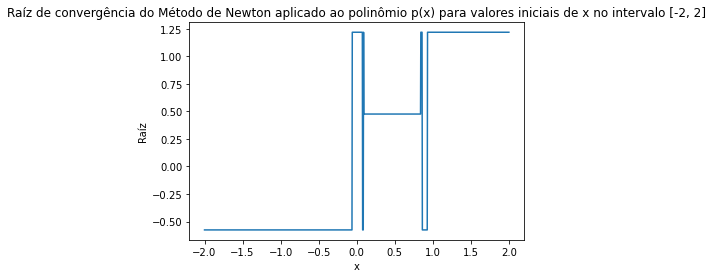

In [20]:
last_x_for_initial_x_in_interval = []
for initial_x in a_b_interval:
        last_x = newton_pts(p, dp, initial_x)[-1]
        last_x_for_initial_x_in_interval.append(last_x)
        
plt.plot(a_b_interval, last_x_for_initial_x_in_interval)
plt.title("Raíz de convergência do Método de Newton aplicado ao polinômio p(x) para valores iniciais de x no intervalo [-2, 2]")
plt.xlabel("x")
plt.ylabel("Raíz")
plt.show()

Comente os gráficos.

Notamos do gráfico da função de p(x) que existem três raízes no intervalo [-2 ,2]: uma próxima de x = -0.1, uma próxima de x = 0.8 e outra de x = 1.2. 

Geometricamente, a convergência do Método de Newton está atrelada ao fato de que a reta tangente de uma função (cuja inclinação é determinada pela sua derivada) geralmente "indica a direção" onde se pode encontrar um valor de x mais próximo da raíz (f(x) = 0) ao encontrar a interseção dessa reta tangente com o eixo horizontal.

O gráfico do Número de Iterações vs Valor inicial de X nos mostra como, em alguns casos, a reta tangente pode não necessariamente indicar a "direção certa". Para valores de x próximos de -0.1, 0.8 ou 1.2, onde a derivada da função é bem próxima de zero, a reta tangente quase horizontal transporta o x da próxima iteração do Método de Newton para um valor bem distante da raíz, causando um número de iterações alto para sua convergência. 

O gráfico da Raíz obtida vs Valor Inicial de X mostra como diferentes valores iniciais podem determinar qual é o intervalo onde o Método de Newton irá "agir" para encontrar a raíz. Para valores negativos de x em que a derivada é positiva e relativamente vertical, o método converge para obter a raíz de maneira "bem comportada" dentro do intervalo entre o valor inicial e a raíz para um x negativo. Se o valor de x está em um local onde a a derivada da função se aproxima de zero, o Método de Newton faz com que o x seja transportado para um outro intervalo com derivada negativa, onde então o ponto vai "ladeira abaixo" se aproximando do valor da raíz para um x positivo. O mesmo raciocínio se aplica se analisamos o movimento do x indo da direita para a esquerda (positivo pro negativo): para valores altos de x, onde a derivada é negativa e relativamente vertical, o método converge para obter a raíz de maneira bem comportada dentro do intervalo entre o valor inicial a raiz para um x positivo. Se o valor de x se aproxima de um lugar onde a derivada da função é zero, o Método de Newton faz com que o x seja transportado para o intervalo onde a derivada é positiva, odne então o ponto vai "ladeira acima" se aproximando da raíz para um x com valor negativo.

## Questão 5: Outro polinômio
Repita o mesmo estudo para o polinômio

$$p(x) = 1 - \frac{1}{2}x - \frac{3}{2}x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5. $$

Gráfico

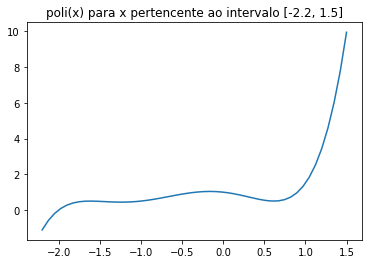

In [21]:
p_coefs = [1, -1/2, -3/2, 1/2, 3/2, 1/2]
p = cria_poli(p_coefs)

plot_function(p, -2.2, 1.5)
plt.show()

Iterações para encontrar as raízes, e raízes encontradas.

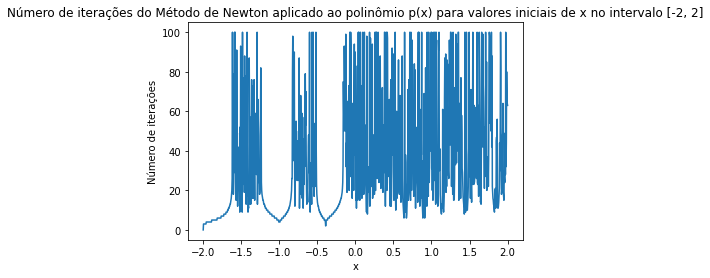

In [22]:
a_b_interval = np.linspace(-2.0, 2.0, num=1000)
dp = cria_derivada_poli(p_coefs)

num_of_iterations_for_initial_x_in_interval = []
for initial_x in a_b_interval:
        num_of_iterations = len(newton_pts(p, dp, initial_x)) - 1
        num_of_iterations_for_initial_x_in_interval.append(num_of_iterations)


ax = plt.gca()
plt.plot(a_b_interval, num_of_iterations_for_initial_x_in_interval)
plt.title("Número de iterações do Método de Newton aplicado ao polinômio p(x) para valores iniciais de x no intervalo [-2, 2]")
plt.xlabel("x")
plt.ylabel("Número de iterações")
plt.show()

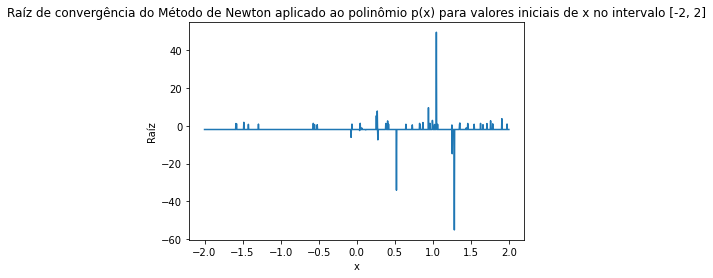

In [23]:
last_x_for_initial_x_in_interval = []
for initial_x in a_b_interval:
        last_x = newton_pts(p, dp, initial_x)[-1]
        last_x_for_initial_x_in_interval.append(last_x)
        
plt.plot(a_b_interval, last_x_for_initial_x_in_interval)
plt.title("Raíz de convergência do Método de Newton aplicado ao polinômio p(x) para valores iniciais de x no intervalo [-2, 2]")
plt.xlabel("x")
plt.ylabel("Raíz")
plt.show()

O que mudou dessa vez? Que conclusão você tira disso?

Agora existem muito mais regiões onde o número de iterações é muito alto (em termos absolutos e quando comparado à média) e mais regiões onde há alternância entre o valor da raíz obtido. Se analisamos o gráfico da nova função p(x), notamos agora que, na região analisada, existem mais pontos onde a derivada é zero e mais pontos onde a concavidade da função se altera.

A conclusão é que 1) devemos ser cuidadosos ao usar o Método de Newton em intervalos com derivadas iguais ou próximas de zero; 2) Se existem muitas raízes dentro de uma região e estamos interessados em apenas uma (por exemplo estamos interessados apenas na raíz positiva), devemos tomar cuidado para que o Método de Newton não nos distancie da raíz almejada e nos leve à outra raíz.